In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("주요발생국가주간동향(4월2째주).csv", index_col='국가', encoding='cp949')
print(data)

       4월06일   4월07일   4월08일   4월09일   4월10일   4월11일   4월12일
국가                                                          
미국    335524  364723  387547  424945  461437  495535  524903
스페인   130709  135032  140510  146690  152446  157022  161852
이탈리아  128948  132547  135586  139422  143626  147577  152271
독일    100024  102453  107591  112113  118181  122171  124908
프랑스    70478   74390   78167   82048   86334   90276   93790
중국     81708   81740   81802   81865   81907   81953   82052
영국     47806   51608   55242   60733   65077   73758   78991
이란     58226   60500   62589   64586   66220   68192   70029
스위스    21104   21652   22241   22789   23574   24308   24900
한국     10284   10331   10384   10423   10450   10480   10512


In [4]:
print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [5]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [6]:
type(chartdata)

pandas.core.series.Series

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', family='AppleGothic')

Text(0.5, 1.0, '4월 6일 코로나 발생 건수')

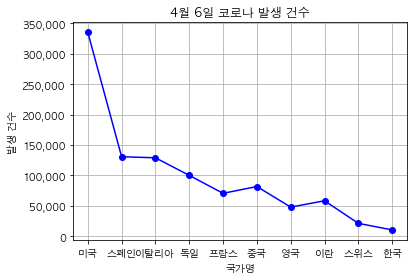

In [8]:
YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
plt.plot(chartdata, color='blue', linestyle='solid', marker='o')
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.grid(True)
plt.xlabel('국가명')

plt.ylabel("발생 건수")
plt.title('4월 6일 코로나 발생 건수')

In [9]:
COUNTRY = ['스페인', '프랑스', '독일', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
chartdata = data.loc[COUNTRY, WHEN]
chartdata = chartdata.T
chartdata.columns

Index(['스페인', '프랑스', '독일', '중국', '영국', '이란'], dtype='object', name='국가')

In [10]:
chartdata

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


Text(0.5, 1.0, '일자별 국가명 꺽은 선')

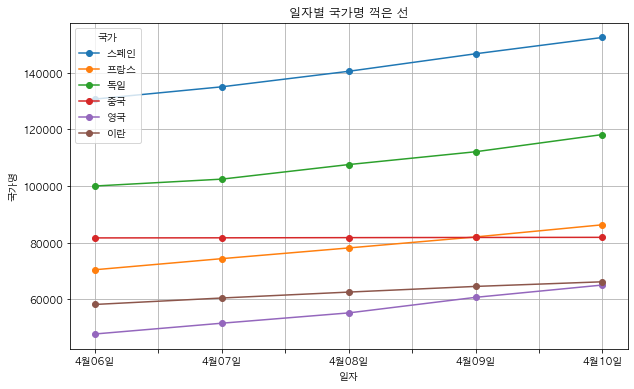

In [11]:
chartdata.plot(title='SomeTitie', figsize=(10, 6), legend = True, marker='o', rot=0)
plt.grid(True)
plt.xlabel('일자')
plt.ylabel('국가명')
plt.title('일자별 국가명 꺽은 선')

In [12]:
data = pd.read_csv("주요발생국가주간동향(4월2째주).csv", index_col='국가', encoding='cp949')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [13]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [14]:
# plt.bar() 메소드를 사용한 막대 그래프
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'  # 예시 : 60건
        ratioval = '%.1f%%' % (ratio[idx])  # 예시 : 20.0%
        # 그래프의 위에 "건수" 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        # 그래프의 중간에 비율 표시
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size - 1, y=meanval + 200, s=average, horizontalalignment='center')

# def MakeBarChart01

In [15]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


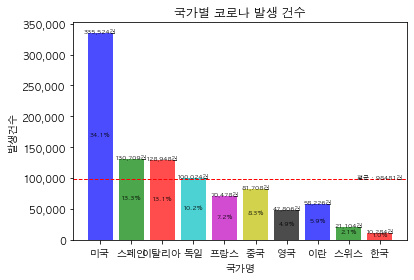

In [16]:
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', 
               ylabel='발생건수', title='국가별 코로나 발생 건수')

In [17]:
# 데이터 프레임을 사용하여 막대 그래프를 그려 주는 함수입니다.
def MakeBarChart02(chartdata, rotation, title, ylim=None, stacked=False, yticks_interval = 10000):
    plt.figure()
    # 범례에 제목을 넣으려면 plot() 메소드의 legend 옵션을 사용해야 합니다.
    chartdata.plot(kind='bar', rot=rotation, title=title, legend=True, stacked=stacked)

    plt.legend(loc='best')

    print(chartdata)

    if stacked == False :
        # max(chartdata.max())은 항목들 값 중에서 최대 값을 의미합니다.
        maxlim = (int(max(chartdata.max()) / yticks_interval) + 1) * yticks_interval
        # print(maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])
    else : # 누적 막대 그래프
        # 국가별 누적 합인 chartdata.sum(axis=1))의 최대 값에 대한 연산이 이루어 져야 합니다.
        maxlim = (int(max(chartdata.sum(axis=1)) / yticks_interval) + 1) * yticks_interval
        # print(maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # y축의 상하한 값이 주어 지는 경우에만 설정합니다.
    if ylim != None :
        plt.ylim(ylim)

# def MakeBarChart02

In [18]:
data = pd.read_csv("주요발생국가주간동향(4월2째주).csv", index_col='국가', encoding='CP949')
data.columns

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')

In [19]:
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]
data.index.name = '국가명'
data.columns.name = '일자'
data

일자,4월06일,4월07일,4월08일
국가명,,,
프랑스,70478,74390,78167
중국,81708,81740,81802
영국,47806,51608,55242
이란,58226,60500,62589


일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

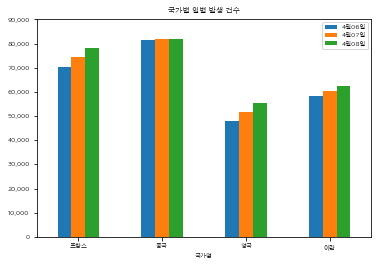

In [20]:
MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수' )

In [21]:
# 전치 프레임을 그래프로 그려 보기
dataT = data.T
dataT

국가명,프랑스,중국,영국,이란
일자,,,,
4월06일,70478,81708,47806,58226
4월07일,74390,81740,51608,60500
4월08일,78167,81802,55242,62589


국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589


<Figure size 432x288 with 0 Axes>

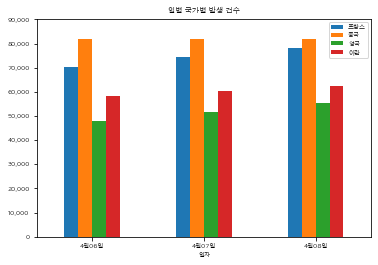

In [22]:
MakeBarChart02(chartdata=dataT, rotation=0, title='일별 국가별 발생 건수')

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

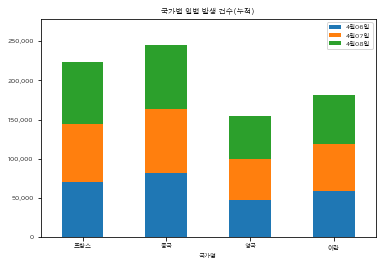

In [23]:
ymax = dataT.sum(axis=1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수(누적)', 
               ylim=[0, ymaxlimit], stacked=True, yticks_interval=50000)

In [24]:
data = pd.read_csv('주요발생국가주간동향(4월2째주).csv', index_col='국가', encoding='CP949')
three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
three

['프랑스', '중국', '영국']

In [25]:
data = data.loc[three]
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [26]:
column_names = data.columns.tolist()
column_names

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [27]:
# 국가별 numpy 배열을 저장하고 있는 사전
chartdata = {}

for row in data.index:
    # data.loc[row])
    # type(row))
    chartdata[row] = data.loc[row].values

chartdata

{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790]),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052]),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991])}

In [28]:
def MakeBarChart03(chartdata, column_names):
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax
# end def MakeBarChart03

(<Figure size 662.4x360 with 1 Axes>, <AxesSubplot:>)

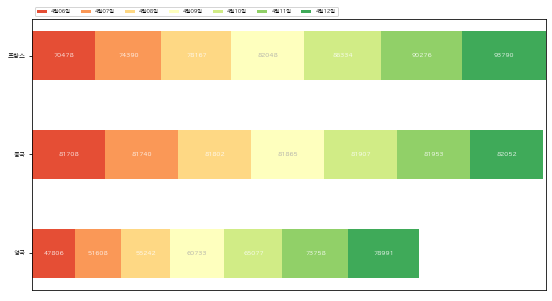

In [29]:
MakeBarChart03(chartdata, column_names)

In [30]:
plt.rc('font', family='AppleGothic')
cnt, PNG, UNDERBAR = 0, '.png', '_'
CHART_NAME = 'pieChartExam'

In [31]:
data = pd.read_csv('주요발생국가주간동향(4월2째주).csv', index_col='국가', encoding='CP949')
print(data.columns)

Index(['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일'], dtype='object')


In [32]:
my_concern = [item for item in data.index if item in ['독일', '프랑스', '중국', '영국']]
print(my_concern)

['독일', '프랑스', '중국', '영국']


In [33]:
data = data.loc[my_concern]
chartdata = data['4월06일']

print(chartdata)

국가
독일     100024
프랑스     70478
중국      81708
영국      47806
Name: 4월06일, dtype: int64


In [34]:
print(type(chartdata))

mylabel = chartdata.index

print(mylabel)

<class 'pandas.core.series.Series'>
Index(['독일', '프랑스', '중국', '영국'], dtype='object', name='국가')


pieChartExam_02.png 파일이 저장되었습니다.


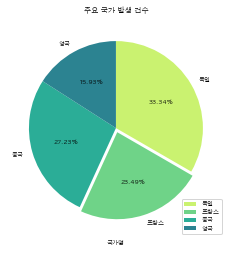

In [37]:
mycolors = ['#CAF270', '#6FD388', '#2BAD97', '#2C8391']

plt.figure()

plt.pie(chartdata, labels=mylabel, shadow=False, explode=(0, 0.05, 0, 0),
        colors=mycolors, autopct='%1.2f%%', startangle=90, counterclock=False)

plt.grid(True)
plt.legend(loc=4)
plt.xlabel('국가명')
# plt.ylabel("발생 건수")
plt.title('주요 국가 발생 건수')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

In [ ]:
import numpy as np
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def getLabelFormat(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:d} 명)".format(pct, absolute)

wedges, texts, autotexts = ax.pie(chartdata, autopct=lambda pct: getLabelFormat(pct, chartdata),
                                  textprops=dict(color="w"))

ax.legend(wedges, mylabel,
          title="국가명",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("주요 국가 발생 건수")

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

In [ ]:
data = pd.read_csv('주요발생국가주간동향(4월2째주).csv', index_col='국가', encoding='CP949')

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']

data = data.loc[COUNTRY, ['4월06일']]
print(data.values.flatten())
print('-'*30)

wedges, texts = ax.pie(data.values.flatten(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    print('ang : ', ang)
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))

    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]

    connectionstyle = "angle,angleA=0,angleB={}".format(ang)

    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    ax.annotate(COUNTRY[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("도우넛 그래프")

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
# plt.legend(loc='best')
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')

In [ ]:
print('주요 국가별 중첩 파이 그래프를 그려 봅니다.')
fig, ax = plt.subplots()

data = pd.read_csv('주요발생국가주간동향(4월2째주).csv', index_col='국가', encoding='CP949')

print(data)
print('-'*30)

COUNTRY = ['독일', '프랑스', '중국', '영국', '이탈리아']
my_concern = [item for item in data.index if item in COUNTRY]
print(my_concern)

data = data.loc[my_concern]

filtered_data = data[['4월06일', '4월07일']]

print(filtered_data)
print('-'*30)

print(filtered_data.index.values)
print('-'*30)

totallist = [] # 차트를 그릴 중첩 데이터
for key in filtered_data.index.values :
       imsi = filtered_data.loc[key].values
       totallist.append([item for item in imsi])

chartdata = np.array(totallist)
print('chartdata : \n', chartdata)

color_su = len(COUNTRY) # 색상의 개수
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(color_su)*4)

inner_colors = cmap(np.arange(2*color_su))
print('inner_colors :', inner_colors)
print('outer_colors :', outer_colors)

cum_sum = chartdata.sum(axis=1) # 누계
print('cum_sum : ', cum_sum)

# 숫자가 적을 수록 가운데 비어 있는 원이 커집니다.
INNER_VACANT_CIRCLE_SIZE = 0.3

# OUTER_PCTDISTANCE : 비율을 보여주는 위치를 지정하는 데, 원점에서의 거리를 지정하면 됩니다.
OUTER_PCTDISTANCE = 0.85
# edgecolor='w', 'None'
ax.pie(cum_sum, radius=1, colors=outer_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       labels=COUNTRY, autopct='%.2f%%', pctdistance=OUTER_PCTDISTANCE)

INNER_PCTDISTANCE = 0.75

ax.pie(chartdata.flatten(), radius=1-INNER_VACANT_CIRCLE_SIZE, colors=inner_colors,
       wedgeprops=dict(width=INNER_VACANT_CIRCLE_SIZE, edgecolor='w'),
       autopct='%.2f%%', pctdistance=INNER_PCTDISTANCE)

ax.set(aspect="equal", title='주요 국가별 중첩 파이 그래프')

cnt += 1
savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
# plt.legend(loc='best')
plt.savefig(savefile, dpi=400)
print(savefile + ' 파일이 저장되었습니다.')